In [33]:
import pandas as pd
import numpy as np
import seaborn as sns

In [34]:
inputdir = "../../data/derived/"
inputdir_for_iv = "../../data/raw/"

In [35]:
#Import the data
data17 = pd.read_csv(inputdir + "chfs2017data.csv")
data15 = pd.read_csv(inputdir + "chfs2015data.csv")
data13 = pd.read_csv(inputdir + "chfs2013data.csv")
data11 = pd.read_csv(inputdir + "chfs2011data.csv")
bank_density_data = pd.read_csv(inputdir_for_iv + "Bank_density_data.csv")

In [36]:
data17.head()

,hhid,hhid_2011,hhid_2013,hhid_2015,hhid_2017,stock_investment,stock_investment_scope,pline,hhead,education_level,...,married,stock_account,health,unemployment,own_house,happiness,rural_household_registration,credit_constraints,financial_literacy,risk_preference
0,2017000001,NaN,NaN,NaN,2017000001,NaN,NaN,1,NaN,1.0,...,1,0.0,3.0,0,1,1.0,1,0,1.0,1.0
1,2017000001,NaN,NaN,NaN,2017000001,NaN,NaN,2,1.0,1.0,...,1,0.0,3.0,0,1,1.0,1,0,1.0,1.0
2,2013013417,NaN,2.013013e+09,2.015018e+09,2017000002,NaN,NaN,2,NaN,2.0,...,1,0.0,2.0,0,1,0.0,0,0,NaN,NaN
3,2013013417,NaN,2.013013e+09,2.015018e+09,2017000002,NaN,NaN,4,NaN,5.0,...,0,0.0,4.0,0,1,0.0,0,0,NaN,NaN
4,2013013417,NaN,2.013013e+09,2.015018e+09,2017000002,NaN,NaN,1,1.0,3.0,...,1,0.0,1.0,0,1,0.0,0,0,NaN,NaN


# Data cleaning

<AxesSubplot:>

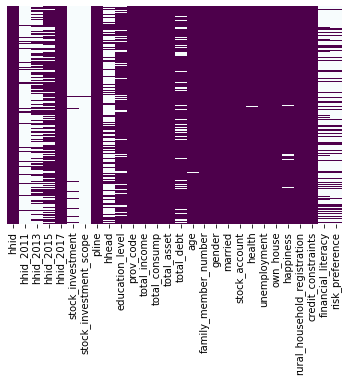

In [37]:
#Data visualization for the missing values
sns.heatmap(data17.isnull(), yticklabels=False, cbar=False, cmap='BuPu_r')

In [38]:
data17.isna().sum()

hhid                                 0
hhid_2011                       110864
hhid_2013                        70872
hhid_2015                        38868
hhid_2017                            0
stock_investment                120378
stock_investment_scope          126351
pline                                0
hhead                            87001
education_level                  17948
prov_code                            0
total_income                         0
total_consump                        0
total_asset                          0
total_debt                       18867
age                                 47
family_member_number                11
gender                               8
married                              0
stock_account                      385
health                              88
unemployment                         0
own_house                            0
happiness                         1415
rural_household_registration         0
credit_constraints       

In [39]:
#Row numbers for chfs 2017 data
data17.shape[0]

127012

**Deal with missing values of stock-related variables**

In [40]:
data17["stock_investment"] = np.where(data17["stock_account"] == 0, 0, data17["stock_investment"])

In [41]:
data17["stock_investment"] = np.where((data17["stock_investment"] == ".d") | 
                                      (data17["stock_investment"] == ".r") |
                                      (data17["stock_investment"] == ".n"), 
                                      ".", data17["stock_investment"])
data17["stock_investment"] = np.where(data17["stock_investment"] == ".", -1, data17["stock_investment"])
data17["stock_investment"] = data17["stock_investment"].astype(float)

In [42]:
data17["stock_investment_scope"] = np.where(data17["stock_investment"] == 0, 
                                            0, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] > 0) & 
                                            (data17["stock_investment"] < 10000), 
                                            1, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 10000) & 
                                            (data17["stock_investment"] < 30000),
                                            2, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 30000) & 
                                            (data17["stock_investment"] < 50000),
                                            3, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 50000) & 
                                            (data17["stock_investment"] < 70000),
                                            4, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 70000) & 
                                            (data17["stock_investment"] < 100000),
                                            5, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 100000) & 
                                            (data17["stock_investment"] < 300000),
                                            6, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 300000) & 
                                            (data17["stock_investment"] < 500000),
                                            7, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 500000) & 
                                            (data17["stock_investment"] < 1000000),
                                            8, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 1000000) & 
                                            (data17["stock_investment"] < 5000000),
                                            9, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where((data17["stock_investment"] >= 5000000) & 
                                            (data17["stock_investment"] < 10000000),
                                            10, data17["stock_investment_scope"])
data17["stock_investment_scope"] = np.where(data17["stock_investment"] >= 10000000,
                                            11, data17["stock_investment_scope"])

In [43]:
#Delete unneeded variables
del data17["stock_account"]
del data17["stock_investment"]

In [44]:
#Rename the following variables
data17.rename(columns = {'stock_investment_scope':'stock_investment'}, inplace = True)

In [45]:
#Since my research question is focused on the household level, I only need one data per household.
#That is, the data of the head of the household.
data17 = data17.dropna(subset = ['hhead'])
del data17['hhead']

In [46]:
data15.head()

,hhid_2015,financial_literacy_2015,risk_preference_2015
0,2015000001,1.0,0.0
1,2015000002,3.0,2.0
2,2015000003,1.0,0.0
3,2015000004,3.0,4.0
4,2015000005,0.0,0.0


In [47]:
data13.head()

,hhid_2013,financial_literacy_2013,risk_preference_2013
0,2013000001,1.0,1.0
1,2013000002,2.0,1.0
2,2013000003,2.0,0.0
3,2013000004,3.0,0.0
4,2013000005,2.0,2.0


In [48]:
data11.head()

,hhid_2011,risk_preference_2011
0,201100001,0.0
1,201100002,0.0
2,201100003,0.0
3,201100004,0.0
4,201100005,0.0


In [49]:
data17['hhid_2015'] = np.where(data17["hhid_2015"].isnull() == True, -1, data17["hhid_2015"])
data17['hhid_2013'] = np.where(data17["hhid_2013"].isnull() == True, -1, data17["hhid_2013"])
data17['hhid_2011'] = np.where(data17["hhid_2011"].isnull() == True, -1, data17["hhid_2011"])
data17['hhid_2015'] = data17['hhid_2015'].astype(int)
data17['hhid_2013'] = data17['hhid_2013'].astype(int)
data17['hhid_2011'] = data17['hhid_2011'].astype(int)

You can observe a large number of missing values in `financial_literacy` and `risk_preference` in data17 because only new respondents were interviewed in these two related questions in the 2017 survey. Therefore, I need to merge the previous data and fill in the missing values.

In [50]:
data1 = pd.merge(data17, data15, on = 'hhid_2015', how = 'outer')
data2 = pd.merge(data1, data13, on = 'hhid_2013', how = 'outer')
data3 = pd.merge(data2, data11, on = 'hhid_2011', how = 'outer')
#Merge the csv file which contains the instrumental variable I needed
data = pd.merge(data3, bank_density_data, on = 'prov_code', how = 'outer')
#The merge method I used produces a lot of na values, remove them.
data = data.dropna(subset = ['hhid'])
#The merge method I used also produces a lot of duplicate values, so I need to remove these duplicates.
data = data.drop_duplicates(subset = ['hhid'], keep = 'first')

In [51]:
data['financial_literacy'] = np.where(data["financial_literacy"].isnull() == True, 
                                      data["financial_literacy_2015"], data["financial_literacy"])
data['financial_literacy'] = np.where(data["financial_literacy"].isnull() == True, 
                                      data["financial_literacy_2013"], data["financial_literacy"])

In [52]:
data['risk_preference'] = np.where(data["risk_preference"].isnull() == True, data["risk_preference_2015"], 
                                   data["risk_preference"])
data['risk_preference'] = np.where(data["risk_preference"].isnull() == True, data["risk_preference_2013"], 
                                   data["risk_preference"])
data['risk_preference'] = np.where(data["risk_preference"].isnull() == True, data["risk_preference_2011"], 
                                   data["risk_preference"])

In [53]:
#Delete unneeded variables
del data["hhid_2017"]
del data["hhid_2015"]
del data["hhid_2013"]
del data["hhid_2011"]
del data["financial_literacy_2015"]
del data["financial_literacy_2013"]
del data["risk_preference_2015"]
del data["risk_preference_2013"]
del data["risk_preference_2011"]
del data["prov_code"]
del data["bank_number"]
del data["prov_area"]

In [54]:
data.isna().sum()

hhid                               0
stock_investment                1264
pline                              0
education_level                   53
total_income                       0
total_consump                      0
total_asset                        0
total_debt                      8337
age                               11
family_member_number               3
gender                             1
married                            0
health                             9
unemployment                       0
own_house                          0
happiness                        458
rural_household_registration       0
credit_constraints                 0
financial_literacy                46
risk_preference                 3692
bank_density                       0
dtype: int64

<AxesSubplot:>

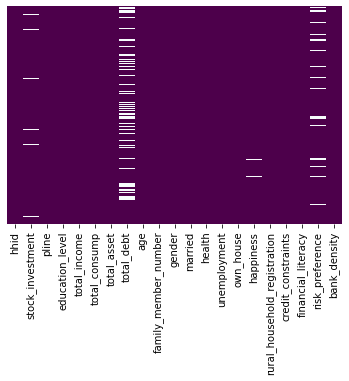

In [55]:
#Data visualization for the missing values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='BuPu_r')

In [56]:
#Delete rows with too many missing values
data = data.dropna(subset = ['total_debt'])
data = data.dropna(subset = ['risk_preference'])
data = data.dropna(subset = ['stock_investment'])
data = data.dropna(subset = ['happiness'])

In [57]:
data.isna().sum()

hhid                             0
stock_investment                 0
pline                            0
education_level                 37
total_income                     0
total_consump                    0
total_asset                      0
total_debt                       0
age                              7
family_member_number             3
gender                           0
married                          0
health                           7
unemployment                     0
own_house                        0
happiness                        0
rural_household_registration     0
credit_constraints               0
financial_literacy              11
risk_preference                  0
bank_density                     0
dtype: int64

In [58]:
#Continue processing the missing values
data['education_level'] = data['education_level'].fillna(data['education_level'].median())
data['health'] = data['health'].fillna(data['health'].median())
data['family_member_number'] = data['family_member_number'].fillna(data['family_member_number'].median())
data['age'] = data['age'].fillna(data['age'].mean())
data['financial_literacy'] = data['financial_literacy'].fillna(data['financial_literacy'].median())

In [59]:
#The following variables contain `.d` | `.r` | `.e` in their values, remove them
data = data.drop(data[data['stock_investment'] == '.d'].index)
data = data.drop(data[data['stock_investment'] == '.r'].index)
data = data.drop(data[data['stock_investment'] == '.e'].index)

In fact, there is no restriction on the age of the head of the household, but since my research question requires the head of the household to be a person of `full civil capacity`, therefore I have set the age of the household head to be greater than or equal to `16` years old.

In addition, the number of data where the head of the household is less than 16 years old is very, very small and therefore deleted these data has little influence.

In [60]:
data = data.drop(data[data['age'] < 16].index)

<AxesSubplot:>

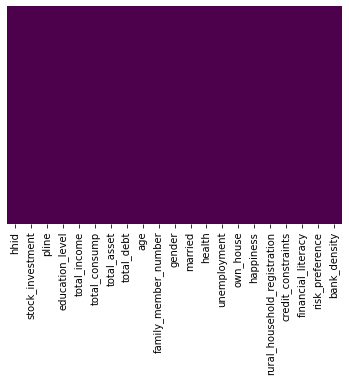

In [61]:
#All missing values have been processed
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='BuPu_r')

In [62]:
data.describe()

,hhid,pline,education_level,total_income,total_consump,total_asset,total_debt,age,family_member_number,gender,married,health,unemployment,own_house,happiness,rural_household_registration,credit_constraints,financial_literacy,risk_preference,bank_density
count,2.768900e+04,27689.000000,27689.000000,2.768900e+04,2.768900e+04,2.768900e+04,2.768900e+04,27689.000000,27689.000000,27689.000000,27689.000000,27689.000000,27689.000000,27689.000000,27689.000000,27689.000000,27689.000000,27689.000000,27689.000000,27689.000000
mean,1.767211e+09,1.559825,3.470801,1.019783e+05,6.854870e+04,1.157961e+06,7.340514e+04,52.673261,3.940771,0.172993,0.889270,2.448987,0.123190,0.923869,0.702373,0.565820,0.080501,1.046878,1.263895,0.088717
std,6.228196e+08,0.982863,1.642893,2.183073e+05,8.416080e+04,2.225233e+06,3.154981e+05,12.944040,2.278903,0.378248,0.313803,1.004436,0.328661,0.265213,0.457223,0.495658,0.272073,1.095141,1.322749,0.099593
min,2.011000e+08,1.000000,1.000000,-4.950324e+06,7.368000e+02,-2.124020e+05,0.000000e+00,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001606
25%,2.013010e+09,1.000000,2.000000,2.601750e+04,2.804000e+04,1.404100e+05,0.000000e+00,44.000000,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035234
50%,2.015004e+09,1.000000,3.000000,6.147100e+04,4.909000e+04,4.327330e+05,0.000000e+00,52.655574,3.000000,0.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.059904
75%,2.017005e+09,2.000000,4.000000,1.146338e+05,8.127600e+04,1.155093e+06,3.300000e+04,62.000000,5.000000,0.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.098834
max,2.017040e+09,20.000000,9.000000,8.497832e+06,3.434645e+06,6.394004e+07,2.023763e+07,117.000000,30.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000,0.491327


In [63]:
len(data)

27689

In [64]:
#Export data
data.to_csv(inputdir + 'processed_chfs_data.csv', index=False)